## CS230 Deep Learning  | Model Baseline 

Fall 2019: Sheun Aluko, Surya Narayanan, Vadim Piccini

Note: util.py defines several utilities for loading and processing raw data, ml_helpers defines ml specific functions

In [1]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  

# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

Reloaded: util
Reloaded: ml_helpers


In [2]:
#set params
batch_size=8
num_epochs=150
data_fraction = 1
learning_rate = 0.0003

In [3]:
#load data 
data = u.data_load(f=data_fraction) 


Loading data for term index: 8
Fraction of data that will be loaded=1

Loading train set
Removed 6 lesion(s) of 1995
On index: 100
On index: 200
On index: 300
On index: 400
On index: 500
On index: 600
On index: 700
On index: 800
On index: 900
On index: 1000
On index: 1100
On index: 1200
On index: 1300
On index: 1400
On index: 1500
On index: 1600
On index: 1700
On index: 1800
On index: 1900
Done

Loading val set
Removed 0 lesion(s) of 179
On index: 100
Done

Loading test set
Removed 1 lesion(s) of 203
On index: 100
On index: 200
Done

Train Size: 1989
Val Size: 179


In [4]:
# RUN THE MODEL 
result = ml.run_model(data=data,batch_size=batch_size,num_epochs=num_epochs,learning_rate=learning_rate,model_id='baseline')



Using provided data
Runing model:: v0_t1989_e150_b8_lr0.0003
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Fitting multi_GPU=[False] model with bs=8,epochs=150,lr=0.0003
Train on 1989 samples, validate on 179 samples
Epoch 1/150
1989/1989 [==============================] - 221s 111ms/sampl

1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0015 - IoU: 0.0301 - val_loss: 0.0341 - val_IoU: 0.0036
Epoch 49/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0017 - IoU: 0.0284 - val_loss: 0.0258 - val_IoU: 0.0019
Epoch 50/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0018 - IoU: 0.0261 - val_loss: 0.0265 - val_IoU: 0.0018
Epoch 51/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0019 - IoU: 0.0281 - val_loss: 0.0317 - val_IoU: 5.2532e-04
Epoch 52/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0021 - IoU: 0.0226 - val_loss: 0.0254 - val_IoU: 5.6792e-04
Epoch 53/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0019 - IoU: 0.0271 - val_loss: 0.0281 - val_IoU: 0.0025
Epoch 54/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 0.0015 - IoU: 0.0305 - val_loss: 0.0276 - val_IoU: 9.4728e-04
Epoch 5

1989/1989 [==============================] - 201s 101ms/sample - loss: 4.3381e-04 - IoU: 0.0523 - val_loss: 0.0193 - val_IoU: 0.0015
Epoch 105/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 4.2656e-04 - IoU: 0.0551 - val_loss: 0.0192 - val_IoU: 0.0027
Epoch 106/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 4.1279e-04 - IoU: 0.0563 - val_loss: 0.0186 - val_IoU: 0.0013
Epoch 107/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 4.0666e-04 - IoU: 0.0532 - val_loss: 0.0185 - val_IoU: 6.3256e-04
Epoch 108/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 3.9869e-04 - IoU: 0.0542 - val_loss: 0.0188 - val_IoU: 0.0038
Epoch 109/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 3.5258e-04 - IoU: 0.0552 - val_loss: 0.0186 - val_IoU: 0.0048
Epoch 110/150
1989/1989 [==============================] - 201s 101ms/sample - loss: 3.7401e-04 - IoU: 0.0540 - val_loss: 0.0190

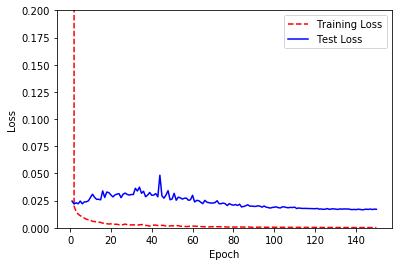

In [5]:
ml.train_curve(result['train_info'].history,name=result['name'])

In [6]:
np.save("models/{}_history".format(result['name']), result['train_info'].history)
np.save("models/{}_time".format(result['name']), result['time_info'])